In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
import os
current_dir = os.getcwd()
print(current_dir)

C:\Users\Dell\Desktop\MyPython\Yandex.Practica\ПРЕДЛОЖЕНИЯ\Школьники\Работа_над_материалами\Тема_7


In [4]:
import warnings
warnings.filterwarnings('ignore')

## Задача 1

In [5]:
PATH_OUT = r'C:\Users\Dell\Desktop\MyPython\Yandex.Practica\ПРЕДЛОЖЕНИЯ\Школьники\Работа_над_материалами\Тема_7'

In [4]:
df = pd.read_csv(PATH_OUT + '\\tg_7_1.csv',sep=';', encoding='cp1251', skipinitialspace=True, decimal=',')
df = df.dropna()  # удалили строки с пропусками
df.head(10)

,температура,влажность,продажи
0,17,41,93
1,17,79,96
2,17,73,97
3,18,64,101
4,18,80,102
5,18,67,104
6,19,60,115
7,19,76,103
8,22,55,135
9,22,65,119


In [5]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

RANDOM_STATE = 42
SIZE = 0.15

feature = df[['температура', 'влажность']]
target = df['продажи']

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=SIZE, random_state=RANDOM_STATE)

lin_regr = LinearRegression().fit(x_train, y_train)
prediction_1 = lin_regr.predict(x_test)

print(prediction_1.round(0))

[167. 159. 153. 127. 130. 135. 182. 150. 145. 100. 176. 129. 165.  99.
 113.]


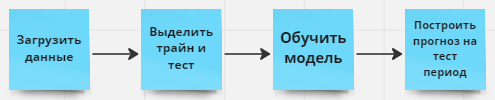

## Задача 2

Вы всё также работаете аналитиком в компании по продажи мороженного в парках. И проблема всё таже - в компании участились случаи, когда на конец дня остаётся не распроданное мороженное, а в некоторые дни наоборот - не хватает мороженного для покупателей. Необходимо научиться предсказывать продажи завтрашнего дня. Для этого вы будете использовать модель линейной регрессии продаж мороженного. Но набор факторов теперь будет иным [’температура’, ‘дождь’]. Особенность данных в том, что фактор ‘дождь’ - бинарная величина: т.е. был или не был дождь в день продаж.

При построении модели учесть:

отобрать нужные факторы
использовать библиотеку sklearn
для разбиения на выборки использовать функцию train_test_split и параметр random_state = 42. Размер тестовой выборки равен 15%
необходимо провести категоризацию фактора ‘дождь’ методом OneHotEncoder
вывести значения прогнозной модели для тестовой выборки, округлённой до целого.
Исходные данные

Данные находятся в файле data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны три столбца. Названия столбцов - показаны ниже.

Дана таблица с тремя столбцами:
- продажи - продажи мороженного в штуках
- температура - температура воздуха на улице в градусах Цельсия
- дождь - был или не был дождь

In [50]:
df = pd.read_csv(PATH_OUT + '\\tg_7_2.csv',sep=';', encoding='cp1251', skipinitialspace=True, decimal=',')
df = df.iloc[:, 0:3]

In [51]:
df.head(10)

,температура,дождь,продажи
0,17,да,68
1,17,нет,72
2,17,да,110
3,18,нет,94
4,18,нет,111
5,18,нет,114
6,19,нет,95
7,19,нет,76
8,22,да,117
9,22,да,110


In [52]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

SIZE = 0.15
RANDOM_STATE = 42

def get_ohe(train, categ):
    '''
    Функция для ohe_категоризации необходимых столбцов и последующего объединения с количественными столбцами
    
    На вход: выборка трайн или тест И названия категориальных столбцов
    '''
    temp_df = pd.DataFrame(data=ohe.transform(train[categ]), columns=ohe.get_feature_names_out())
    data = pd.concat([train.reset_index(drop=True), temp_df], axis=1)
    data = data.drop(columns=categ, axis=1)
    return data


numeric_var = ['температура']
category_var = ['дождь']
targ = ['продажи']

feature = df[numeric_var + category_var]
target = df[targ]


x_train, x_test, y_train, y_test = train_test_split(feature, target, 
                                                    test_size=SIZE, random_state=RANDOM_STATE)
ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(x_train[category_var])

x_train_cat = get_ohe(x_train, category_var)
x_test_cat = get_ohe(x_test, category_var)

lin_regr = LinearRegression()
lin_regr.fit(x_train_cat, y_train)
prediction_1 = lin_regr.predict(x_test_cat)

print(prediction_1.round(0).flatten())

[162. 155. 120. 128. 128. 135. 176. 120. 142.  72. 169.  99. 162. 100.
 114.]


In [34]:
# ИСПОЛЬЗУЕМ flatten())
[162. 155. 120. 128. 128. 135. ]

[162. 155. 120. 128. 128. 135. 176. 120. 142.  72. 169.  99. 162. 100.
 114.]


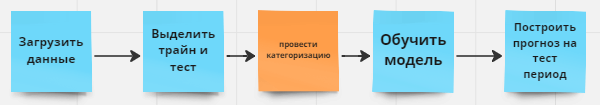

## Задача 3

In [41]:
df = pd.read_csv(PATH_OUT + '\\tg_7_3.csv',sep=';', encoding='cp1251', skipinitialspace=True, decimal=',')
df = df.iloc[:, 0:4]
df.head(7)

,цена,возраст,мощность,кузов
0,9800,19,163,не седан
1,1500,22,75,не седан
2,3600,15,69,не седан
3,650,28,102,не седан
4,2200,19,109,не седан
5,14500,9,125,не седан
6,999,25,101,не седан


In [42]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

SIZE = 0.15
RANDOM_STATE = 42


def get_ohe(train, categ):
    '''
    Функция для ohe_категоризации необходимых столбцов и последующего объединения с количественными столбцами
    На вход: выборка трайн или тест И названия категориальных столбцов
    '''
    temp_df = pd.DataFrame(data=ohe.transform(train[categ]), columns=ohe.get_feature_names_out())
    data = pd.concat([train.reset_index(drop=True), temp_df], axis=1)
    data = data.drop(columns=categ, axis=1)
    return data


numeric_var = ['возраст', 'мощность']
category_var = ['кузов']
targ = ['цена']

# Формируем фичи и целевую
feature = df[numeric_var + category_var]
target = df[targ]

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=SIZE, random_state=RANDOM_STATE)

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(x_train[category_var])

x_train_cat = get_ohe(x_train, category_var)
x_test_cat = get_ohe(x_test, category_var)

lin_regr = LinearRegression()
lin_regr.fit(x_train_cat, y_train)
prediction_1 = lin_regr.predict(x_test_cat)

print(round(r2_score(y_test, prediction_1.flatten()), 2), round(mean_absolute_error(y_test, prediction_1.flatten()), 2))

0.49 2418.39


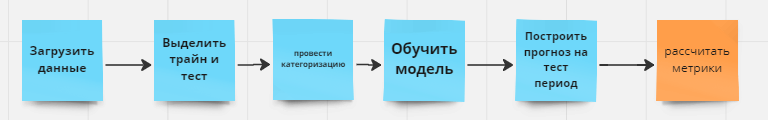

## Задача 4

In [16]:
df = pd.read_csv(PATH_OUT + '\\tg_7_4.csv',sep=';', encoding='cp1251', skipinitialspace=True, decimal=',')
df.head(7)

,id,удой,эке,протеин,спо,порода,"Жирность,%"
0,1,5863,14.2,1743.0,0.89,Вис Бик Айдиал,3.58
1,2,5529,12.8,2138.0,0.94,Вис Бик Айдиал,3.54
2,3,5810,14.0,1854.0,0.93,РефлешнСоверинг,103.59
3,4,5895,12.4,2012.0,0.89,РефлешнСоверинг,3.40
4,5,5302,12.8,NaN,0.93,Вис Бик Айдиал,3.73
5,6,5254,12.7,1806.0,0.89,РефлешнСоверинг,3.13
6,7,5910,12.2,NaN,0.93,Вис Бик Айдиал,3.48


In [7]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_percentage_error

SIZE = 0.15
RANDOM_STATE = 42

df = df.dropna()


def replace(x):
    outliers = x > (x.quantile(.75) + (x.quantile(.75) - x.quantile(.25)) * 3)
    x[outliers] = x.median()
    return x


df['удой'] = df.groupby(['порода'], group_keys=False)['удой'].transform(replace)

tt = {'Вис Бик Айдиал': 'Вис Бик Айдиал',
      'РефлешнСоверинг': 'РефлешнСоверинг',
      'РефлешнСоверинггггг': 'РефлешнСоверинг'}

df['порода'] = df['порода'].map(tt)

df['спо_кат'] = df['спо'].apply(lambda x: 'менее_09' if x <= 0.9 else 'более_09')


def get_ohe(train, categ):
    '''
    Функция для ohe_категоризации необходимых столбцов и последующего объединения с количественными столбцами
    На вход: выборка трайн или тест И названия категориальных столбцов
    '''
    temp_df = pd.DataFrame(data=ohe.transform(train[categ]), columns=ohe.get_feature_names_out())
    data = pd.concat([train.reset_index(drop=True), temp_df], axis=1)
    data = data.drop(columns=categ, axis=1)
    return data


numeric_var = ['эке', 'протеин']
category_var = ['порода', 'спо_кат']
targ = ['удой']

# Формируем фичи и целевую
feature = df[numeric_var + category_var]
target = df[targ]

x_train, x_test, y_train, y_test = train_test_split(feature, target, 
                                                    test_size=SIZE, random_state=RANDOM_STATE)

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(x_train[category_var])

x_train_cat = get_ohe(x_train, category_var)
x_test_cat = get_ohe(x_test, category_var)

lin_regr = LinearRegression()
lin_regr.fit(x_train_cat, y_train)
prediction_1 = lin_regr.predict(x_test_cat)

print(round(r2_score(y_test, prediction_1.flatten()), 2), 
      round(mean_absolute_percentage_error(y_test, prediction_1.flatten()) * 100, 2))

0.64 3.85


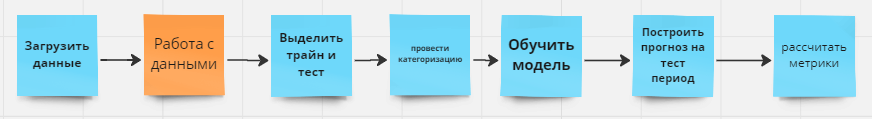

******************************************************************************************************************

# ПОСТРОЕНИЕ ПРОГНОЗНОЙ МОДЕЛИ

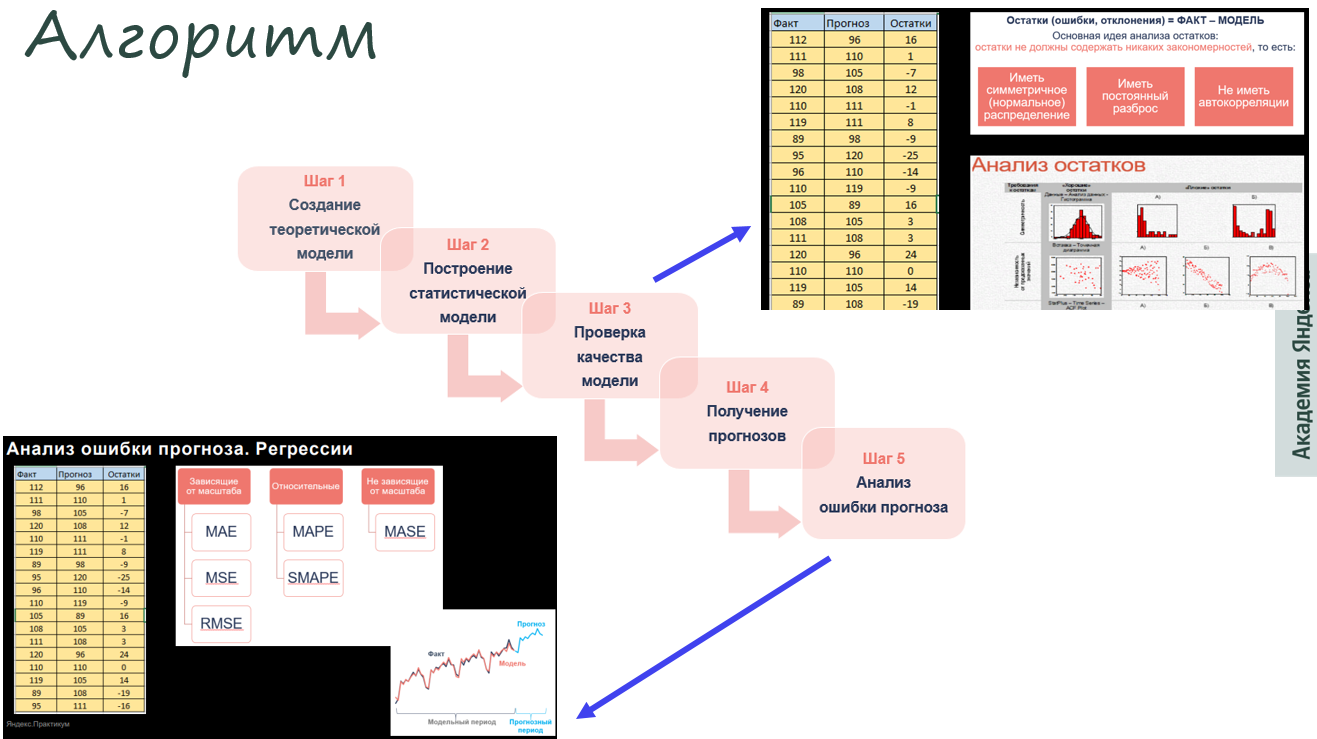

In [8]:
def quality_model(fact, prediction):
    '''
    Функция выводит:
    - R2 для регрессионных моделей.
    - Графики остатков: гистограмма, скатерплот "остатки - предсказанные значения"
    '''
    params = {'axes.labelsize' : 14, 'figure.titlesize': 18,
              'xtick.labelsize': 12, 'ytick.labelsize': 12, 'legend.fontsize' :12
             }
    plt.rcParams.update(params)    
    
    fact = pd.DataFrame(fact.reset_index(drop = True))
    pred = pd.DataFrame(prediction.flatten(), columns = ['предсказанное'])
    df = pd.concat([fact, pred], axis = 1)

    print('\033[1m'+'РАСЧЁТ R2:'+ '\033[0m')
    print('\033[1m'+'Учтённые факторы на', round(r2_score(df['удой'],df['предсказанное']),2)*100, 'процентов объясняют целевую'+ '\033[0m')        
        
    fig, ax = plt.subplots(1, 2, figsize = (9,3))
    plt.tight_layout()
    plt.suptitle('Анализ остатков модели', y=1.05)
    
    sns.scatterplot(data = df, x = 'предсказанное',  y = df['удой'] - df['предсказанное'], ax = ax[0])
    sns.histplot(x = df['удой'] - df['предсказанное'], bins = 80, kde=True, ax = ax[1])
    
    ax[1].axvline(x=(df['удой'] - df['предсказанное']).mean(), color='r', label='mean')
    ax[1].axvline(x=(df['удой'] - df['предсказанное']).median(), color='tab:orange', label='median')
    
    ax[0].set_xlabel('Предсказанные значения')
    ax[1].set_ylabel('')
    ax[1].legend()
    plt.show()

************************************************************************************************************

**Отбор факторов**

In [17]:
df.head(2)

,id,удой,эке,протеин,спо,порода,"Жирность,%"
0,1,5863,14.2,1743.0,0.89,Вис Бик Айдиал,3.58
1,2,5529,12.8,2138.0,0.94,Вис Бик Айдиал,3.54


In [ ]:
sweets

In [44]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_percentage_error

SIZE = 0.15
RANDOM_STATE = 42

df = df.dropna()


def replace(x):
    outliers = x > (x.quantile(.75) + (x.quantile(.75) - x.quantile(.25)) * 3)
    x[outliers] = x.median()
    return x


df['удой'] = df.groupby(['порода'], group_keys=False)['удой'].transform(replace)

tt = {'Вис Бик Айдиал': 'Вис Бик Айдиал',
      'РефлешнСоверинг': 'РефлешнСоверинг',
      'РефлешнСоверинггггг': 'РефлешнСоверинг'}

df['порода'] = df['порода'].map(tt)

df['спо_кат'] = df['спо'].apply(lambda x: 'менее_09' if x <= 0.9 else 'более_09')


def get_ohe(train, categ):
    '''
    Функция для ohe_категоризации необходимых столбцов и последующего объединения с количественными столбцами
    На вход: выборка трайн или тест И названия категориальных столбцов
    '''
    temp_df = pd.DataFrame(data=ohe.transform(train[categ]), columns=ohe.get_feature_names_out())
    data = pd.concat([train.reset_index(drop=True), temp_df], axis=1)
    data = data.drop(columns=categ, axis=1)
    return data


numeric_var = ['эке', 'протеин']
category_var = ['порода', 'спо_кат']
targ = ['удой']

# Формируем фичи и целевую
feature = df[numeric_var + category_var]
target = df[targ]

x_train, x_test, y_train, y_test = train_test_split(feature, target, 
                                                    test_size=SIZE, random_state=RANDOM_STATE)

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(x_train[category_var])

x_train_cat = get_ohe(x_train, category_var)
x_test_cat = get_ohe(x_test, category_var)

lin_regr = LinearRegression()
lin_regr.fit(x_train_cat, y_train)

prediction_t = lin_regr.predict(x_train_cat)


# prediction_1 = lin_regr.predict(x_test_cat)

#print(round(r2_score(y_test, prediction_1.flatten()), 2), 
#      round(mean_absolute_percentage_error(y_test, prediction_1.flatten()) * 100, 2))

РАСЧЁТ R2:
Учтённые факторы на 68.0 процентов объясняют целевую


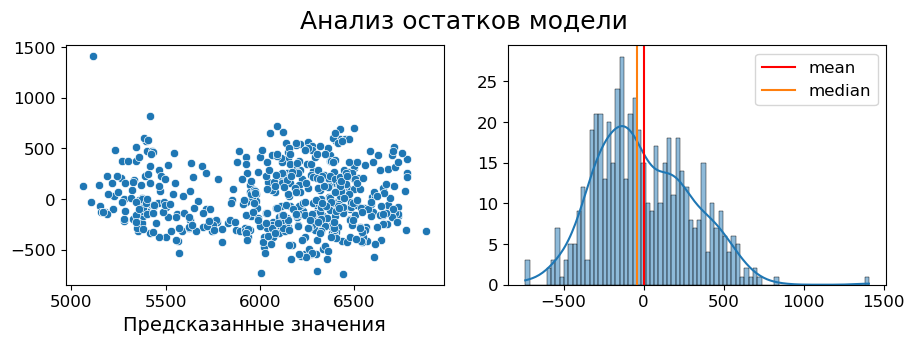

In [14]:
quality_model(y_train, prediction_t)

In [22]:
y_train.reset_index(drop=True)

,удой
0,5284
1,6734
2,5358
3,6649
4,6158
...,...
532,5381
533,5617
534,5987
535,5981


In [26]:
itog = pd.DataFrame(pd.concat([y_train.reset_index(drop=True), round(pd.Series(prediction_t.flatten()), 0)], axis=1))
itog.columns = ['Факт', 'Прогноз']
itog

,Факт,Прогноз
0,5284,5279.0
1,6734,6445.0
2,5358,5383.0
3,6649,6731.0
4,6158,6569.0
...,...,...
532,5381,5439.0
533,5617,5592.0
534,5987,6320.0
535,5981,5780.0


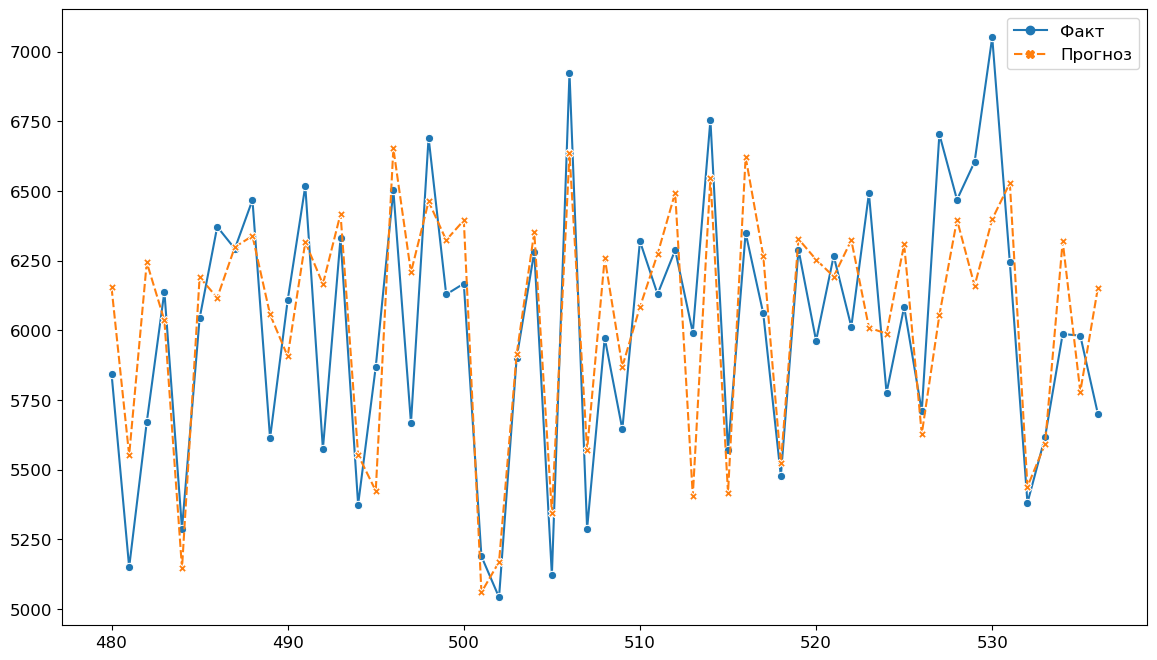

In [37]:
plt.figure(figsize=(14,8))
sns.lineplot(data=itog.loc[480:,], markers=True)

plt.show()

**Пример из временных рядов**

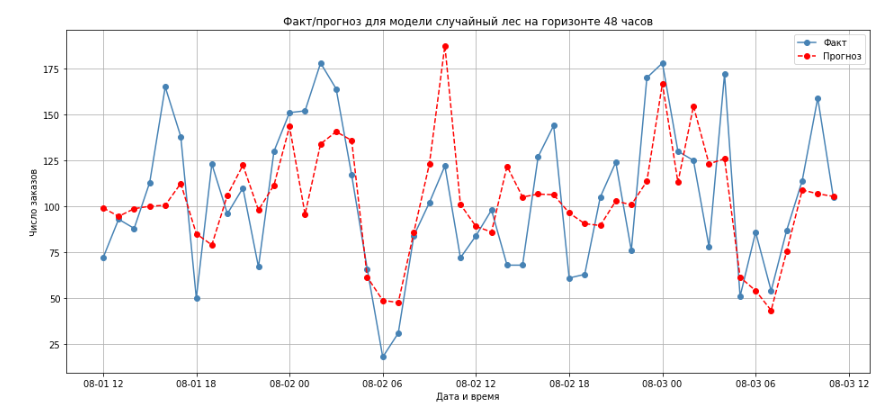

In [45]:
lin_regr.coef_

array([[ 192.55670081,    0.4398484 ,   15.2599921 , -382.58224399]])

## Важность факторов

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_percentage_error

SIZE = 0.15
RANDOM_STATE = 42

df = df.dropna()


def replace(x):
    outliers = x > (x.quantile(.75) + (x.quantile(.75) - x.quantile(.25)) * 3)
    x[outliers] = x.median()
    return x


df['удой'] = df.groupby(['порода'], group_keys=False)['удой'].transform(replace)

tt = {'Вис Бик Айдиал': 'Вис Бик Айдиал',
      'РефлешнСоверинг': 'РефлешнСоверинг',
      'РефлешнСоверинггггг': 'РефлешнСоверинг'}

df['порода'] = df['порода'].map(tt)

df['спо_кат'] = df['спо'].apply(lambda x: 'менее_09' if x <= 0.9 else 'более_09')


def get_ohe(train, categ):
    '''
    Функция для ohe_категоризации необходимых столбцов и последующего объединения с количественными столбцами
    На вход: выборка трайн или тест И названия категориальных столбцов
    '''
    temp_df = pd.DataFrame(data=ohe.transform(train[categ]), columns=ohe.get_feature_names_out())
    data = pd.concat([train.reset_index(drop=True), temp_df], axis=1)
    data = data.drop(columns=categ, axis=1)
    return data


numeric_var = ['эке', 'протеин']
category_var = ['порода', 'спо_кат']
targ = ['удой']

# Формируем фичи и целевую
feature = df[numeric_var + category_var]
target = df[targ]

x_train, x_test, y_train, y_test = train_test_split(feature, target, 
                                                    test_size=SIZE, random_state=RANDOM_STATE)

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(x_train[category_var])

x_train_cat = get_ohe(x_train, category_var)
x_test_cat = get_ohe(x_test, category_var)


scaler = StandardScaler()
scaler.fit(x_train_cat[numeric_var])
x_train_cat[numeric_var] = scaler.transform(x_train_cat[numeric_var]) 
x_test_cat[numeric_var] = scaler.transform(x_test_cat[numeric_var]) 

# ПРОВЕРКА
x_train_cat.head(3)

# lin_regr = LinearRegression()
# lin_regr.fit(x_train_cat, y_train)

# ediction_t = lin_regr.predict(x_train_cat)


# prediction_1 = lin_regr.predict(x_test_cat)

# rint(round(r2_score(y_test, prediction_1.flatten()), 2), 
#      round(mean_absolute_percentage_error(y_test, prediction_1.flatten()) * 100, 2))

,эке,протеин,порода_РефлешнСоверинг,спо_кат_менее_09
0,-1.558615,-1.256088,0.0,1.0
1,1.338268,-0.861050,0.0,0.0
2,-1.187220,-1.353494,1.0,1.0


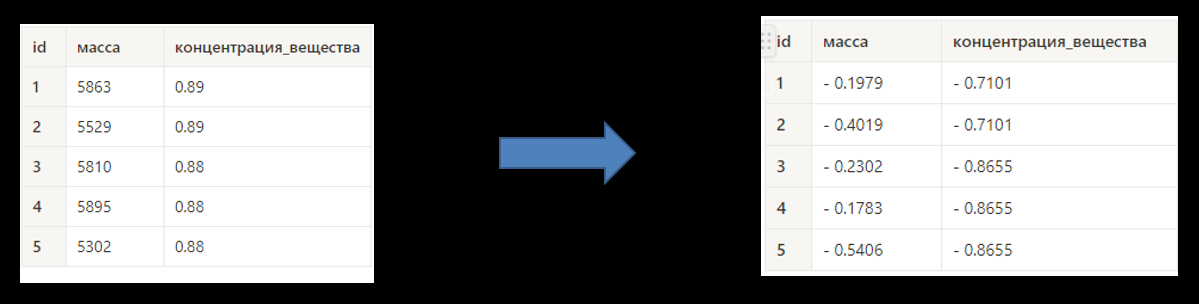

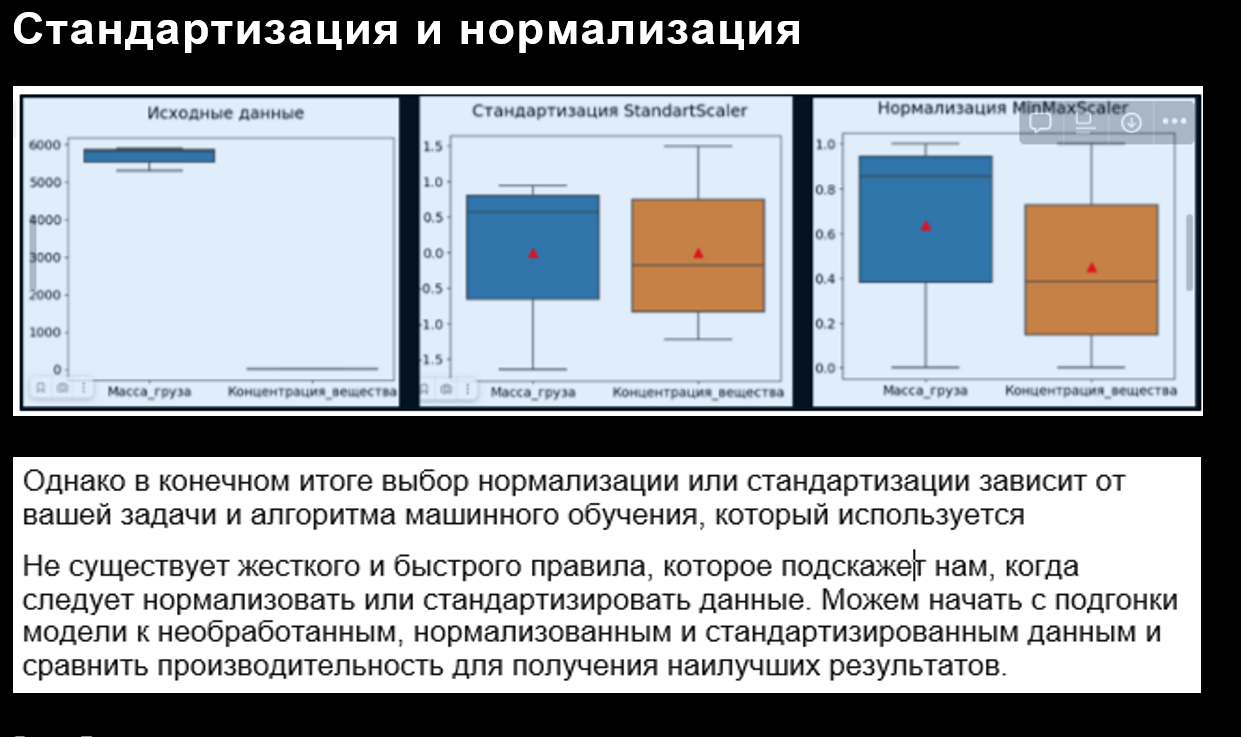

In [41]:
lin_regr = LinearRegression()
lin_regr.fit(x_train_cat, y_train)

pediction_t = lin_regr.predict(x_train_cat)


prediction_1 = lin_regr.predict(x_test_cat)

print(round(r2_score(y_test, prediction_1.flatten()), 2), 
      round(mean_absolute_percentage_error(y_test, prediction_1.flatten()) * 100, 2))

0.64 3.85


In [43]:
lin_regr.coef_

array([[ 259.23419486,   81.28062972,   15.2599921 , -382.58224399]])

In [42]:
coeff_df = pd.DataFrame(lin_regr.coef_.flatten(), x_test_cat.columns, columns=['Коэффициенты_модели']) 
coeff_df.sort_values(by = 'Коэффициенты_модели', ascending=False)
# стандартизированные расчёты

,Коэффициенты_модели
эке,259.234195
протеин,81.280630
порода_РефлешнСоверинг,15.259992
спо_кат_менее_09,-382.582244


In [ ]:
shap

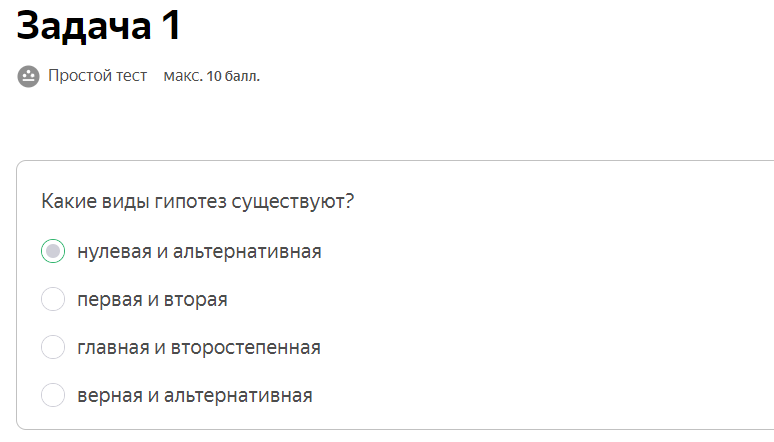

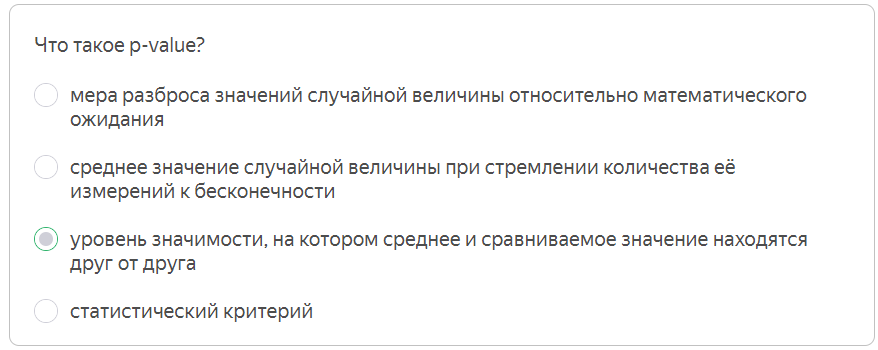

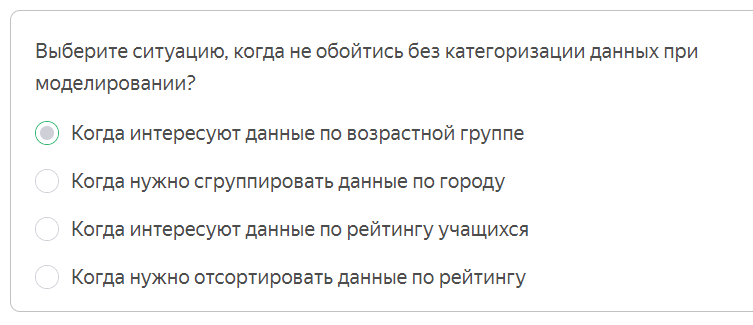

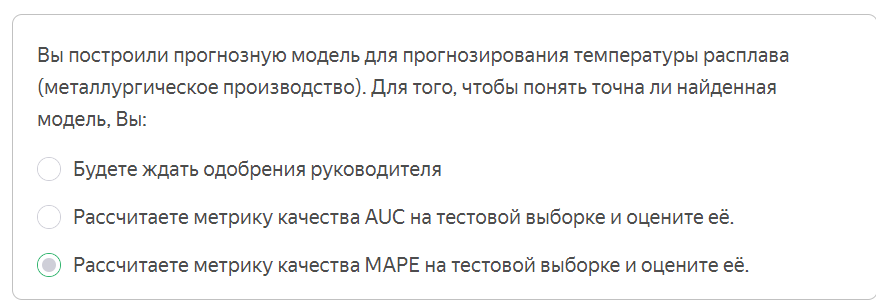

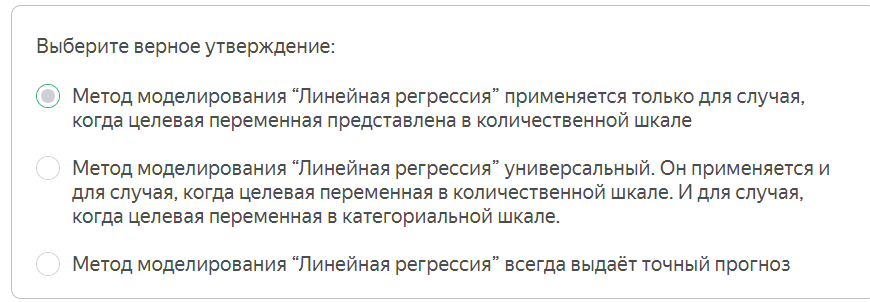

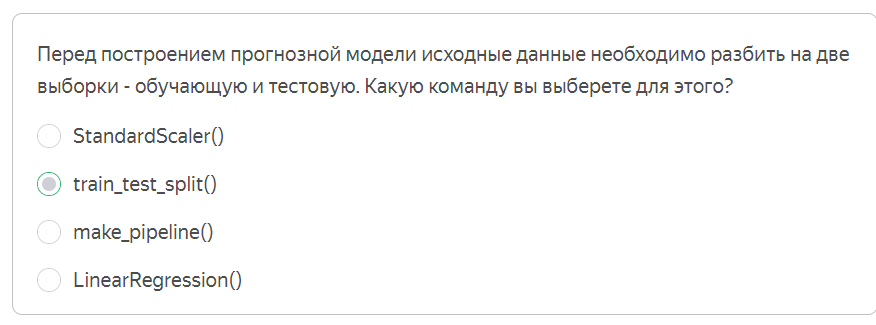

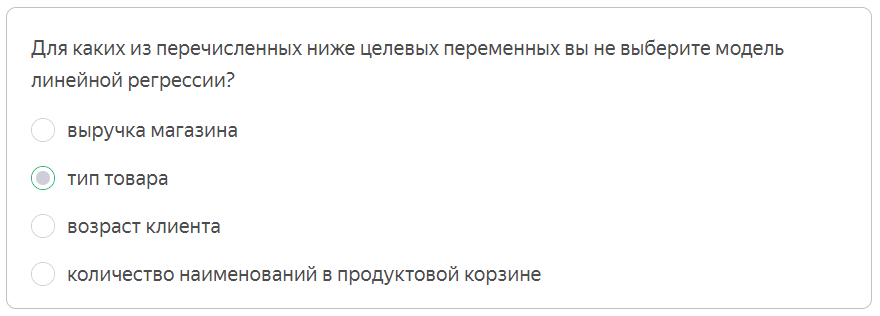

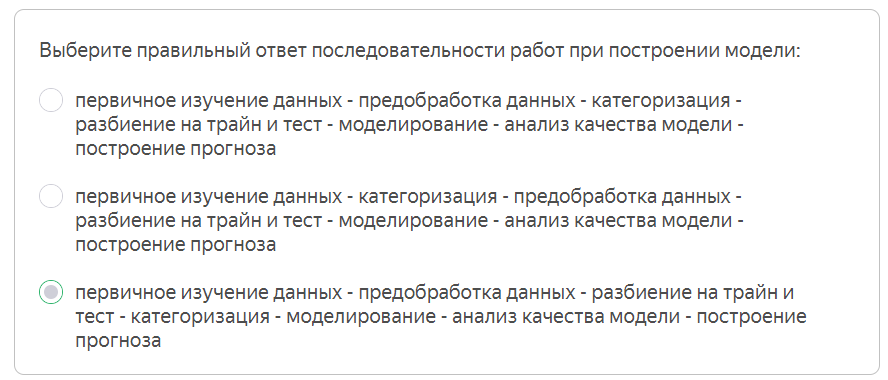

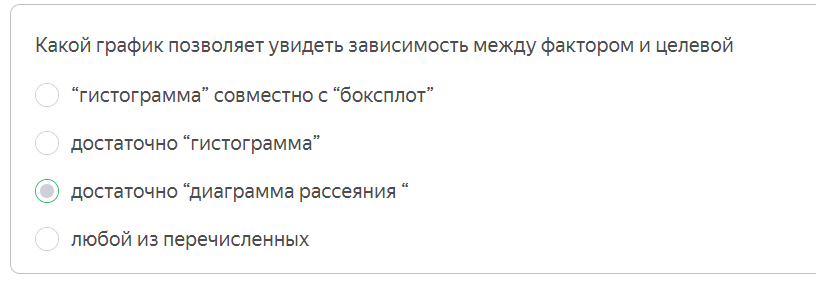

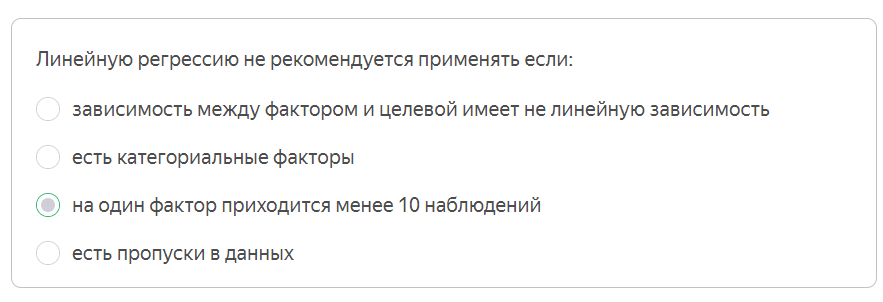